### Memahami Faktor - faktor yang mendorong penjualan tertinggi di zara company

---

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# load the dataset
df = pd.read_csv('Zara_Sales_Analysis.csv', sep=';')


In [28]:

df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [30]:
df.isna().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [31]:
df['name']= df['name'].fillna('Unknown')

In [32]:
df.duplicated().sum()

0

***1. Apakah Produk yang Dipromosikan Penjualannya Lebih Tinggi?**

--- Rata-Rata Penjualan Berdasarkan Promosi ---
  Promotion  Sales Volume
0       Yes   1827.175000
1        No   1820.545455


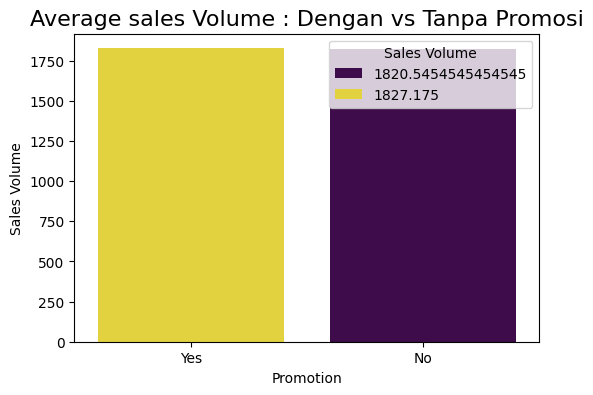

In [33]:
##Untuk menjawab ini, kita akan mengelompokkan data berdasarkan kolom Promotion ('Yes' dan 'No'), 
# lalu menghitung rata-rata Sales Volume untuk masing-masing kelompok.


# Analisis Pengaruh Promosi
promo_analysis = df.groupby('Promotion')['Sales Volume'].mean().sort_values(ascending=False).reset_index()


print("--- Rata-Rata Penjualan Berdasarkan Promosi ---")
print(promo_analysis)

# Visualisasi
plt.figure(figsize=(6, 4))
sns.barplot(data=promo_analysis, x='Promotion', y='Sales Volume', hue='Sales Volume', palette='viridis')
plt.title('Average sales Volume : Dengan vs Tanpa Promosi', fontsize=16)
# plt.xlabel('Dipromosikan?', fontsize=12)
# plt.ylabel('Rata-Rata Volume Penjualan', fontsize=12)
plt.show()

**2. Bagaimana Pengaruh Posisi Produk di Toko?**


--- Rata-Rata Penjualan Berdasarkan Posisi Produk ---
  Product Position  Sales Volume
0   Front of Store   1873.144928
1            Aisle   1828.824742
2          End-cap   1778.255814


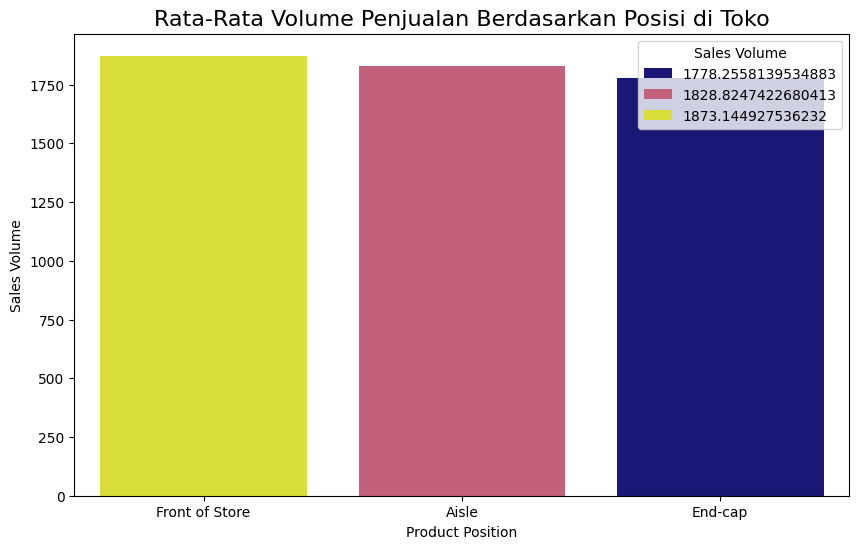

In [35]:
#kita akan mengelompokkan data berdasarkan Product Position dan melihat rata-rata Sales Volume-nya. 
#Mengurutkan hasilnya akan membantu kita melihat posisi mana yang paling strategis.

# Analisis Pengaruh Posisi Produk
position_analysis = df.groupby('Product Position')['Sales Volume'].mean().sort_values(ascending=False).reset_index()

print("\n--- Rata-Rata Penjualan Berdasarkan Posisi Produk ---")
print(position_analysis)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=position_analysis, x='Product Position', y='Sales Volume', hue='Sales Volume', palette='plasma')
plt.title('Rata-Rata Volume Penjualan Berdasarkan Posisi di Toko', fontsize=16)
# plt.xlabel('Posisi Produk', fontsize=12)
# plt.ylabel('Rata-Rata Volume Penjualan', fontsize=12)
plt.show()

**3. 10 Produk mana yang menjadi 'Bintang Penjualan' kita"**

--- Top 10 Produk Paling Laris ---
                                name  Sales Volume
0                    PLAID OVERSHIRT         10910
1                   POCKET OVERSHIRT          7386
2         FAUX LEATHER BOMBER JACKET          7197
3                FAUX LEATHER JACKET          7113
4  CONTRASTING PATCHES BOMBER JACKET          7050
5          LIGHTWEIGHT BOMBER JACKET          6694
6                PATCH BOMBER JACKET          6446
7         FAUX LEATHER PUFFER JACKET          6401
8          SUIT JACKET IN 100% LINEN          6075
9                  RIB COLLAR JACKET          5747


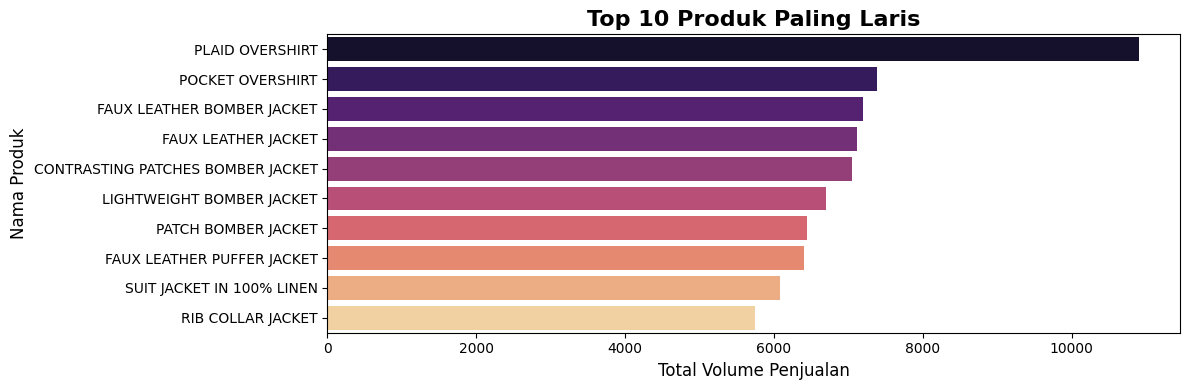

In [44]:
# --- Analisis Top 10 Produk Terlaris ---

# 1. Mengelompokkan berdasarkan 'name', menjumlahkan 'Sales Volume', 
#    mengurutkan, dan mengambil 10 teratas dalam satu baris.
top_10_products = df.groupby('name')['Sales Volume'].sum().sort_values(ascending=False).head(10).reset_index()

print("--- Top 10 Produk Paling Laris ---")
print(top_10_products)


# 2. Visualisasi
plt.figure(figsize=(12, 4))
sns.barplot(data=top_10_products, x='Sales Volume', y='name', hue='name', palette='magma')
plt.title('Top 10 Produk Paling Laris', fontsize=16, fontweight='bold')
plt.xlabel('Total Volume Penjualan', fontsize=12)
plt.ylabel('Nama Produk', fontsize=12)
plt.tight_layout() # Merapikan layout
plt.show()